#                                      Predict Liver Disease

### Business Objective: The variable to be predicted is categorical (no disease, suspect disease, hepatitis c, fibrosis, cirrhosis). Therefore, this is a classification project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import warnings 
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import pickle

In [2]:
data = pd.read_csv(r"C:\Users\vikra\OneDrive\Desktop\project2DS\project-data.csv",sep=";")
data

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [3]:
# Checking the data type
data.dtypes

category                        object
age                              int64
sex                             object
albumin                        float64
alkaline_phosphatase           float64
alanine_aminotransferase       float64
aspartate_aminotransferase     float64
bilirubin                      float64
cholinesterase                 float64
cholesterol                    float64
creatinina                     float64
gamma_glutamyl_transferase     float64
protein                         object
dtype: object

In [4]:
#Checking the null Values in dataset 
data.isnull().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

<AxesSubplot:>

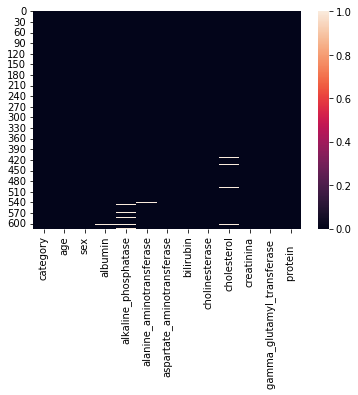

In [5]:
sn.heatmap(data.isnull())

In [6]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [7]:
#Removing the space from Column name
data = data.rename({'gamma_glutamyl_transferase ':'gamma_glutamyl_transferase','protein   ':'protein'},axis=1)
data

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [8]:
from sklearn.impute import KNNImputer
numerical_cols = ['alkaline_phosphatase','alanine_aminotransferase' ,'cholesterol','albumin','protein']
object_cols = ['sex','category']
data['protein'] = pd.to_numeric(data['protein'], errors='coerce')
imputer = KNNImputer(n_neighbors=4)
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

<AxesSubplot:>

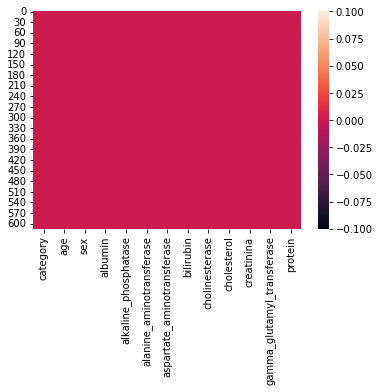

In [9]:
sn.heatmap(data.isnull())

In [10]:
data.isnull().sum()

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64

In [11]:
# 5 categories in Target columns 
data.category.value_counts()

 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64

In [12]:
columns = ["category","sex"]
for i in columns:
    Values_count = data[i].value_counts()
    print(i,"====","\n",Values_count)

category ==== 
  no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64
sex ==== 
 m    377
f    238
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

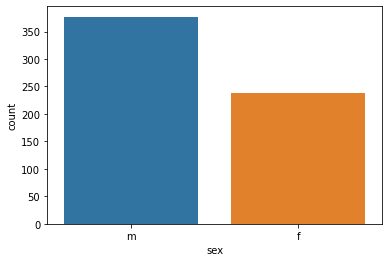

In [13]:
sn.countplot(data['sex'])

<AxesSubplot:xlabel='category', ylabel='count'>

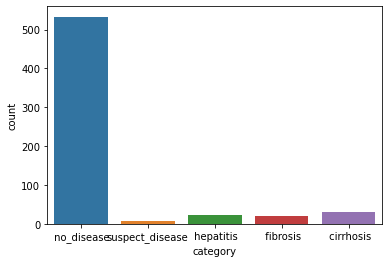

In [14]:
sn.countplot(data['category'])

In [15]:
label_encoder = preprocessing.LabelEncoder()
data['category']=label_encoder.fit_transform(data['category'])
#0 = cirrhosis
#1 = fibrosis
#2 = hepatitis
#3 = no_disease
#4 = suspect_disease
data['sex']=label_encoder.fit_transform(data['sex'])
#1 = male
#0 = Female
data

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.5,52.500,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32,1,38.5,70.300,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.700,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.2,52.000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.2,74.100,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,62,0,32.0,416.600,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.800,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,64,0,29.0,87.300,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,0,46,0,33.0,62.600,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


<AxesSubplot:xlabel='category', ylabel='count'>

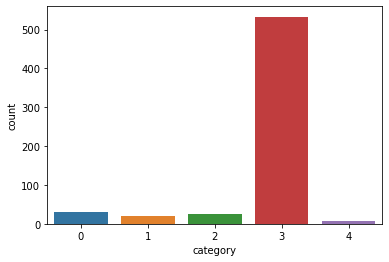

In [16]:
sn.countplot(data['category'])

In [17]:
data.dtypes

category                        int32
age                             int64
sex                             int32
albumin                       float64
alkaline_phosphatase          float64
alanine_aminotransferase      float64
aspartate_aminotransferase    float64
bilirubin                     float64
cholinesterase                float64
cholesterol                   float64
creatinina                    float64
gamma_glutamyl_transferase    float64
protein                       float64
dtype: object

<AxesSubplot:>

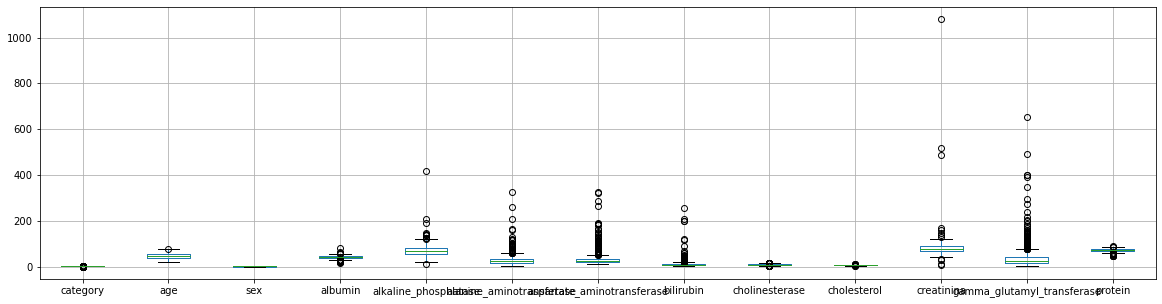

In [18]:
plt.figure(figsize=(20,5))
data.boxplot()

array([[<AxesSubplot:title={'center':'category'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'albumin'}>],
       [<AxesSubplot:title={'center':'alkaline_phosphatase'}>,
        <AxesSubplot:title={'center':'alanine_aminotransferase'}>,
        <AxesSubplot:title={'center':'aspartate_aminotransferase'}>,
        <AxesSubplot:title={'center':'bilirubin'}>],
       [<AxesSubplot:title={'center':'cholinesterase'}>,
        <AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'creatinina'}>,
        <AxesSubplot:title={'center':'gamma_glutamyl_transferase'}>],
       [<AxesSubplot:title={'center':'protein'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

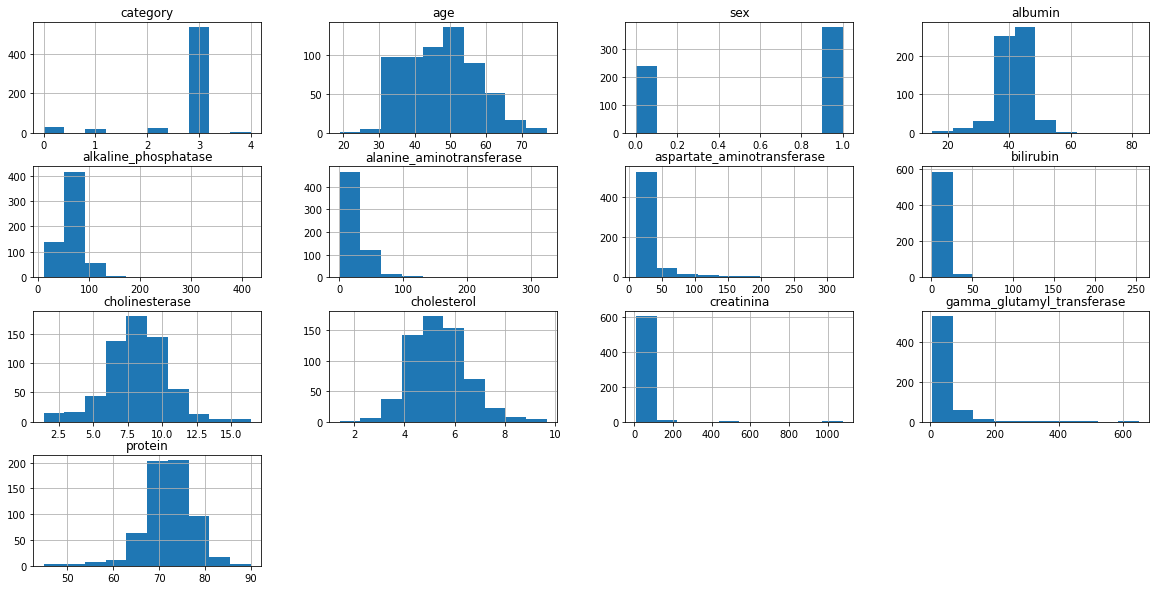

In [19]:
data.hist(figsize=(20,10))

<AxesSubplot:>

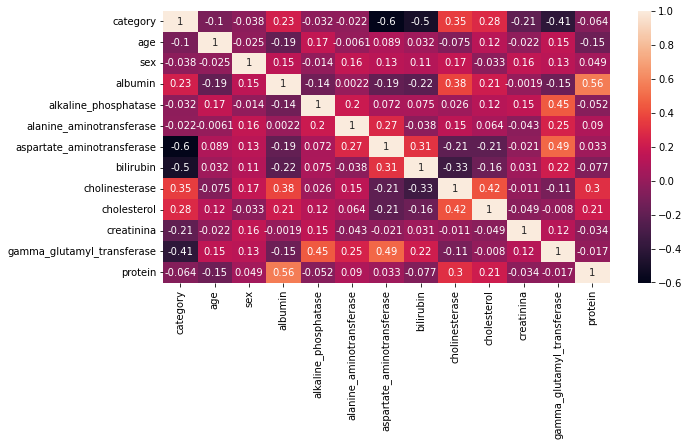

In [20]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(data.corr(),annot=True)

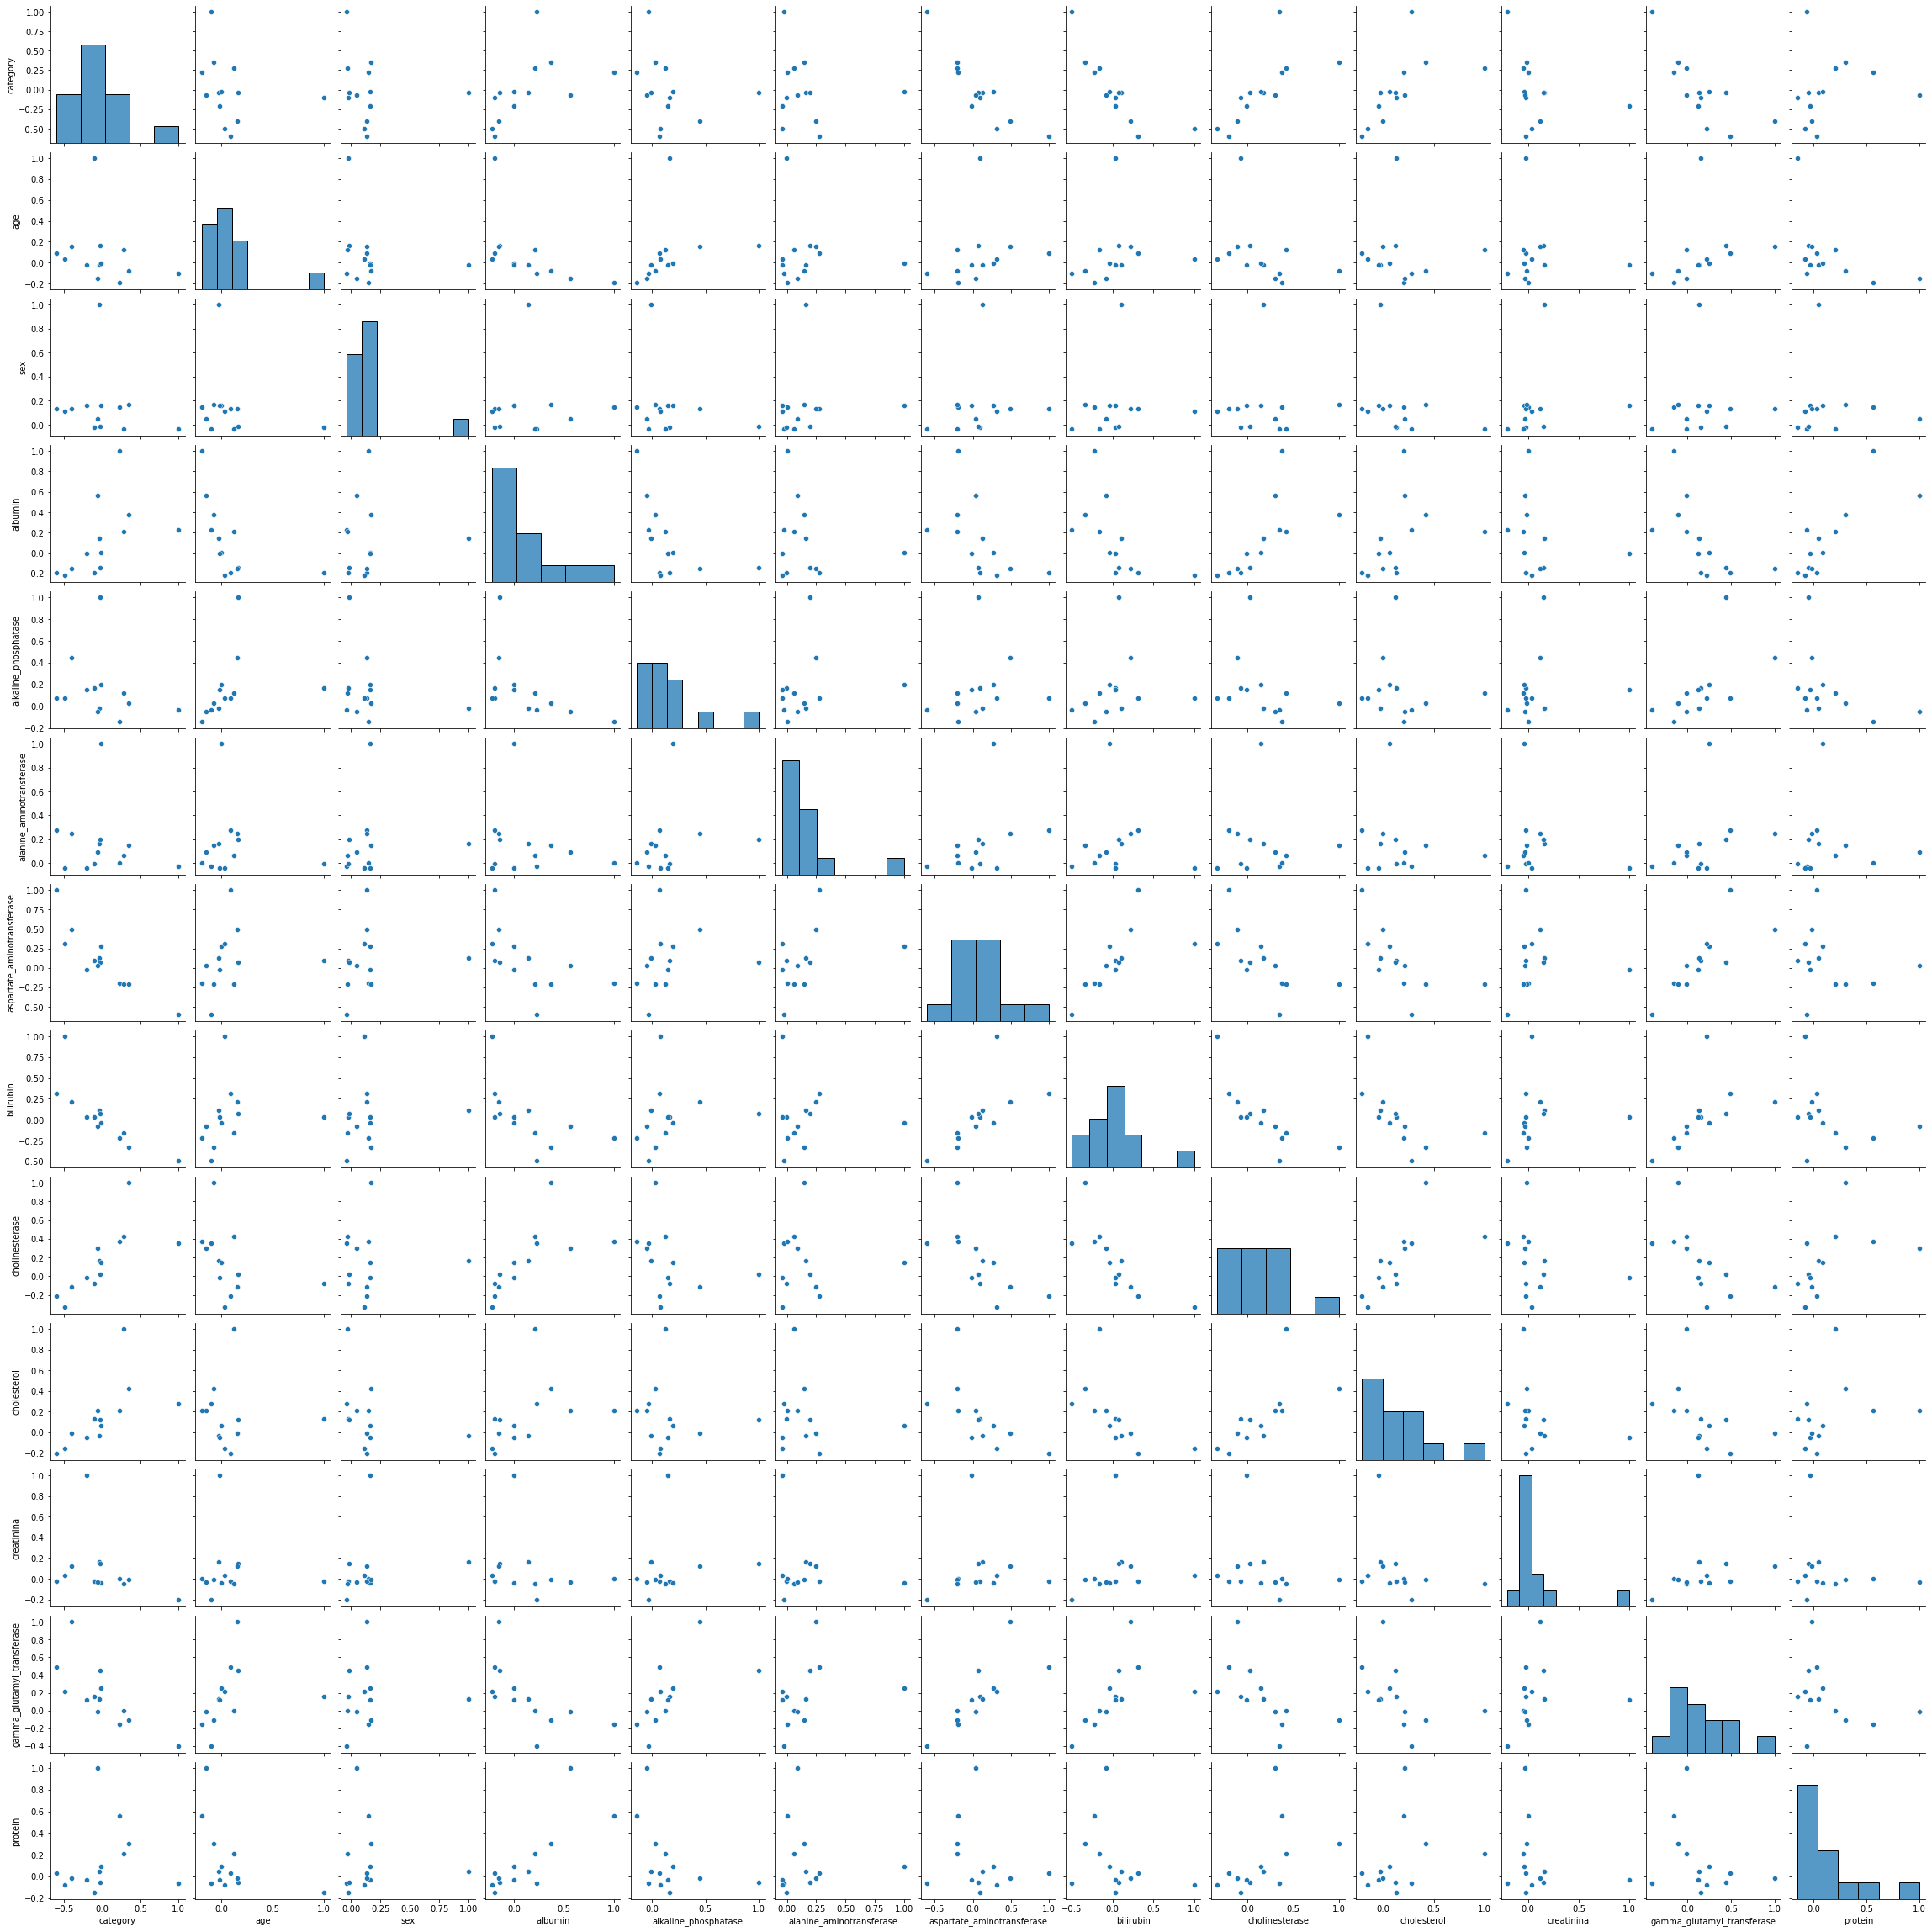

In [21]:
sn.pairplot(data.corr())

In [22]:
data[data["age"]>100]

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein


In [23]:
print("              Total count of people who don't have normal = ")
print("albumin                    :-",len(data[(data["albumin"]<34) | (data["albumin"]>54)]))
print("alkaline_phosphatase       :-",len(data[(data["alkaline_phosphatase"]<40) | (data["alkaline_phosphatase"]>129)]))
print("alanine_aminotransferase   :-",len(data[(data["alanine_aminotransferase"]<7) | (data["alanine_aminotransferase"]>55)]))
print("aspartate_aminotransferase :-",len(data[(data["aspartate_aminotransferase"]<8) | (data["aspartate_aminotransferase"]>48)]))
print("bilirubin                  :-",len(data[(data["bilirubin"]<1) | (data["bilirubin"]>12)]))
print("cholinesterase             :-",len(data[(data["cholinesterase"]<8) | (data["cholinesterase"]>18)]))
print("cholesterol                :-",len([data["cholesterol"]>5.2]))
#print("creatinina Male           :-",len(data[(data["creatinina"]<61.9) | (data["creatinina"]>114.9)]))
#print("creatinina Female         :-",len(data[(data["creatinina"]<53) | (data["creatinina"]>97.2)]))      
print("gamma_glutamyl_transferase :-",len(data[(data["gamma_glutamyl_transferase"]<30) | (data["gamma_glutamyl_transferase"]>50)]))
print("protein                    :-",len(data[(data["protein"]>80)]))

              Total count of people who don't have normal = 
albumin                    :- 47
alkaline_phosphatase       :- 52
alanine_aminotransferase   :- 58
aspartate_aminotransferase :- 66
bilirubin                  :- 137
cholinesterase             :- 280
cholesterol                :- 1
gamma_glutamyl_transferase :- 519
protein                    :- 31


In [24]:
print("           count of female who don't have normal = ")
print("albumin                    :-",len(data[((data['albumin']<34) |(data["albumin"]>54)) & ((data['sex'] == 0))]))
print("alkaline_phosphatase       :-",len(data[((data["alkaline_phosphatase"]<40) | (data["alkaline_phosphatase"]>129)) & ((data["sex"]== 0))]))
print("alanine_aminotransferase   :-",len(data[((data["alanine_aminotransferase"]<7) | (data["alanine_aminotransferase"]>55)) & ((data["sex"]== 0))]))
print("aspartate_aminotransferase :-",len(data[((data["aspartate_aminotransferase"]<8) | (data["aspartate_aminotransferase"]>48)) & ((data["sex"]== 0))]))
print("bilirubin                  :-",len(data[((data["bilirubin"]<1) | (data["bilirubin"]>12)) & ((data["sex"]== 0))]))
print("cholinesterase             :-",len(data[((data["cholinesterase"]<8) | (data["cholinesterase"]>18)) & ((data["sex"]== 0))]))
print("cholesterol                :-",len([(data["cholesterol"]>5.2) & (data["sex"]== 0)]))
#print("creatinina Male           :-",len(data[((data["creatinina"]<61.9) | (data["creatinina"]>114.9)) & ((data["sex"]== 0))]))
#print("creatinina Female         :-",len(data[((data["creatinina"]<53) | (data["creatinina"]>97.2)) & ((data["sex"]== 0))]))
print("gamma_glutamyl_transferase :-",len(data[((data["gamma_glutamyl_transferase"]<30) | (data["gamma_glutamyl_transferase"]>50)) & ((data["sex"]== 0))]))
print("protein                    :-",len(data[(data["protein"]>80) & (data["sex"]== 0)]))

           count of female who don't have normal = 
albumin                    :- 19
alkaline_phosphatase       :- 24
alanine_aminotransferase   :- 17
aspartate_aminotransferase :- 16
bilirubin                  :- 28
cholinesterase             :- 132
cholesterol                :- 1
gamma_glutamyl_transferase :- 211
protein                    :- 11


In [25]:
print("           count of male who don't have normal = ")
print("albumin                    :-",len(data[((data['albumin']<34) |(data["albumin"]>54)) & ((data['sex'] == 1))]))
print("alkaline_phosphatase       :-",len(data[((data["alkaline_phosphatase"]<40) | (data["alkaline_phosphatase"]>129)) & ((data["sex"]== 1))]))
print("alanine_aminotransferase   :-",len(data[((data["alanine_aminotransferase"]<7) | (data["alanine_aminotransferase"]>55)) & ((data["sex"]== 1))]))
print("aspartate_aminotransferase :-",len(data[((data["aspartate_aminotransferase"]<8) | (data["aspartate_aminotransferase"]>48)) & ((data["sex"]== 1))]))
print("bilirubin                  :-",len(data[((data["bilirubin"]<1) | (data["bilirubin"]>12)) & ((data["sex"]== 1))]))
print("cholinesterase             :-",len(data[((data["cholinesterase"]<8) | (data["cholinesterase"]>18)) & ((data["sex"]== 1))]))
print("cholesterol                :-",len([(data["cholesterol"]>5.2) & (data["sex"]== 1)]))
#print("creatinina Male           :-",len(data[((data["creatinina"]<61.9) | (data["creatinina"]>114.9)) & ((data["sex"]== 1))]))
#print("creatinina Female         :-",len(data[((data["creatinina"]<53) | (data["creatinina"]>97.2)) & ((data["sex"]== 1))]))
print("gamma_glutamyl_transferase :-",len(data[((data["gamma_glutamyl_transferase"]<30) | (data["gamma_glutamyl_transferase"]>50)) & ((data["sex"]== 1))]))
print("protein                    :-",len(data[(data["protein"]>80) & (data["sex"]== 1)]))

           count of male who don't have normal = 
albumin                    :- 28
alkaline_phosphatase       :- 28
alanine_aminotransferase   :- 41
aspartate_aminotransferase :- 50
bilirubin                  :- 109
cholinesterase             :- 148
cholesterol                :- 1
gamma_glutamyl_transferase :- 308
protein                    :- 20


In [26]:
print ("           For Female              ")
#0 = cirrhosis
#1 = fibrosis
#2 = hepatitis
#3 = no_disease
#4 = suspect_disease
print("count of female have cirrhosis       =",len(data[(data["category"]==0) & (data["sex"]== 0)]))
print("count of female have fibrosis        =", len(data[(data["category"]==1) & (data["sex"]== 0)]))
print("count of female have hepatitis       =", len(data[(data["category"]==2) & (data["sex"]== 0)]))
print("count of female have no_disease      =",len(data[(data["category"]==3) & (data["sex"]== 0)]))
print("count of female have suspect_disease =",len(data[(data["category"]==4) & (data["sex"]== 0)]))

           For Female              
count of female have cirrhosis       = 10
count of female have fibrosis        = 8
count of female have hepatitis       = 4
count of female have no_disease      = 215
count of female have suspect_disease = 1


In [27]:
print ("             For Male           ")
#0 = cirrhosis
#1 = fibrosis
#2 = hepatitis
#3 = no_disease
#4 = suspect_disease
print("count of Male have cirrhosis       =",len(data[(data["category"]==0) & (data["sex"]== 1)]))
print("count of Male have fibrosis        =", len(data[(data["category"]==1) & (data["sex"]== 1)]))
print("count of Male have hepatitis       =",len(data[(data["category"]==2) & (data["sex"]== 1)]))
print("count of Male have no_disease      =",len(data[(data["category"]==3) & (data["sex"]== 1)]))
print("count of Male have suspect_disease =",len(data[(data["category"]==4) & (data["sex"]== 1)]))

             For Male           
count of Male have cirrhosis       = 20
count of Male have fibrosis        = 13
count of Male have hepatitis       = 20
count of Male have no_disease      = 318
count of Male have suspect_disease = 6


In [28]:
data.describe()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,2.757724,47.408130,0.613008,41.627398,68.379878,28.451870,34.786341,11.396748,8.196634,5.371301,81.287805,39.533171,72.028618
std,0.753819,10.055105,0.487458,5.778682,25.753972,25.448953,33.090690,19.673150,2.205657,1.125918,49.756166,54.661071,5.411936
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,3.000000,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,3.000000,47.000000,1.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,3.000000,54.000000,1.000000,45.250000,79.750000,33.050000,32.900000,11.200000,9.590000,6.070000,88.000000,40.200000,75.400000
max,4.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [29]:
data.corr()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
category,1.000000,-0.101460,-0.038391,0.225501,-0.031539,-0.022427,-0.601843,-0.497505,0.349835,0.276237,-0.206598,-0.405606,-0.064409
age,-0.101460,1.000000,-0.024544,-0.194726,0.165409,-0.006055,0.088666,0.032492,-0.075093,0.124930,-0.022296,0.153087,-0.152874
sex,-0.038391,-0.024544,1.000000,0.146986,-0.013938,0.161818,0.130891,0.111177,0.169111,-0.032592,0.159589,0.133276,0.048840
albumin,0.225501,-0.194726,0.146986,1.000000,-0.144505,0.002196,-0.192579,-0.221442,0.375274,0.207628,-0.001856,-0.153940,0.560733
alkaline_phosphatase,-0.031539,0.165409,-0.013938,-0.144505,1.000000,0.197492,0.071665,0.075170,0.025693,0.123654,0.150304,0.447068,-0.052228
alanine_aminotransferase,-0.022427,-0.006055,0.161818,0.002196,0.197492,1.000000,0.273323,-0.038477,0.146979,0.064339,-0.043028,0.248070,0.090279
aspartate_aminotransferase,-0.601843,0.088666,0.130891,-0.192579,0.071665,0.273323,1.000000,0.312231,-0.208536,-0.208857,-0.021387,0.491263,0.032999
bilirubin,-0.497505,0.032492,0.111177,-0.221442,0.075170,-0.038477,0.312231,1.000000,-0.333172,-0.157422,0.031224,0.217024,-0.076624
cholinesterase,0.349835,-0.075093,0.169111,0.375274,0.025693,0.146979,-0.208536,-0.333172,1.000000,0.422553,-0.011157,-0.110345,0.301188
cholesterol,0.276237,0.124930,-0.032592,0.207628,0.123654,0.064339,-0.208857,-0.157422,0.422553,1.000000,-0.048659,-0.008024,0.208419


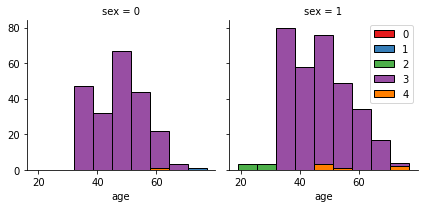

In [30]:
import seaborn as sns
bins = np.linspace(data.age.min(), data.age.max(),10)
grids = sns.FacetGrid(data, col="sex", hue="category", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'age', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

### Auto EDA

In [31]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
df = pd.read_csv(r"C:\Users\vikra\OneDrive\Desktop\project2DS\project-data.csv",sep=";")
profile = ProfileReport(df, explorative = True, dark_mode = True)
profile.to_file("LDP_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df = pd.read_csv(r"C:\Users\vikra\OneDrive\Desktop\project2DS\project-data.csv",sep=";")
df 

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [33]:
# from pandas_profiling import ProfileReport 
# profile = ProfileReport(df, explorative = True, dark_mode = True)
# profile.to_file("LDP_EDA.html")

In [34]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# import matplotlib.pyplot as plt 
# %matplotlib inline 
# import seaborn as sn


# df = AV.AutoViz(r"C:\Users\vikra\OneDrive\Desktop\project2DS\project-data.csv",sep=";")

### Standardise the data

In [35]:
"""from sklearn.preprocessing import MinMaxScaler
# Select only the numerical columns for standardization
numerical_cols = ['age', 'albumin','alkaline_phosphatase','alanine_aminotransferase','aspartate_aminotransferase','bilirubin','cholinesterase','cholesterol','creatinina','gamma_glutamyl_transferase','protein']
numerical_data = data[numerical_cols]

# Create a StandardScaler object and fit_transform the numerical data
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Replace the original numerical features with their standardized values
data[numerical_cols] = standardized_data"""

"from sklearn.preprocessing import MinMaxScaler\n# Select only the numerical columns for standardization\nnumerical_cols = ['age', 'albumin','alkaline_phosphatase','alanine_aminotransferase','aspartate_aminotransferase','bilirubin','cholinesterase','cholesterol','creatinina','gamma_glutamyl_transferase','protein']\nnumerical_data = data[numerical_cols]\n\n# Create a StandardScaler object and fit_transform the numerical data\nscaler = MinMaxScaler()\nstandardized_data = scaler.fit_transform(numerical_data)\n\n# Replace the original numerical features with their standardized values\ndata[numerical_cols] = standardized_data"

In [36]:
data

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.5,52.500,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32,1,38.5,70.300,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.700,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.2,52.000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.2,74.100,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,62,0,32.0,416.600,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.800,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,64,0,29.0,87.300,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,0,46,0,33.0,62.600,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### Balancing Dataset

In [37]:
#! pip install -U imbalanced-learn

In [38]:
data.head(5)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [39]:
x = data.iloc[:,1:]
y = data.iloc[:,0:1]

<AxesSubplot:ylabel='None'>

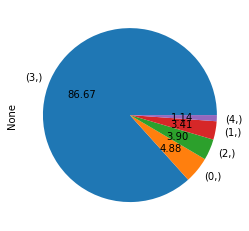

In [40]:
y.value_counts().plot.pie(autopct="%.2f")

### Random UnderSampling

In [41]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler()
# #rus = RandomUnderSampler(sampling_strategy="not minority")

# x_rus, y_rus= rus.fit_resample(x,y)
# ax= y_rus.value_counts().plot.pie(autopct="%.2f")
# _= ax.set_title("Under_sampling")

In [42]:
# ""y_rus.value_counts()""

### Random_Oversampling

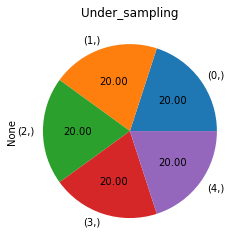

In [43]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
#rus = RandomUnderSampler(sampling_strategy="not minority")

x_ros, y_ros= ros.fit_resample(x,y)
ax= y_ros.value_counts().plot.pie(autopct="%.2f")
_= ax.set_title("Under_sampling")

In [44]:
y_ros.value_counts()

category
0           533
1           533
2           533
3           533
4           533
dtype: int64

In [45]:
# Convert the resampled data to a DataFrame
df_resampled = pd.DataFrame(x_ros, columns=x.columns)
df_resampled['category'] = y_ros
print(df_resampled)
# Concatenate the original data with the resampled data
# data = pd.concat([data, df_resampled])

      age  sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0      32    1     38.5                  52.5                       7.7   
1      32    1     38.5                  70.3                      18.0   
2      32    1     46.9                  74.7                      36.2   
3      32    1     43.2                  52.0                      30.6   
4      32    1     39.2                  74.1                      32.6   
...   ...  ...      ...                   ...                       ...   
2660   74    1     20.3                  84.0                      22.8   
2661   71    1     14.9                  69.8                      19.7   
2662   55    1     47.3                 106.0                     208.8   
2663   74    1     20.3                  84.0                      22.8   
2664   47    1     22.5                 124.0                      79.5   

      aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                      

In [46]:
df_resampled['category'].value_counts()

3    533
4    533
2    533
1    533
0    533
Name: category, dtype: int64

In [47]:
df_resampled.sample(5)

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,category
2442,49,1,21.60,42.200,9.5,10.6,2.4,3.75,3.010,64.0,38.9,44.8,4
494,56,0,36.60,102.300,13.5,14.9,8.4,6.94,5.500,65.0,16.2,71.0,3
463,51,0,43.70,61.300,18.0,23.3,4.3,9.57,6.040,70.0,18.6,75.2,3
688,65,1,46.05,75.575,40.0,54.0,13.0,7.50,6.185,70.0,107.0,79.0,0
2141,47,1,22.50,124.000,79.5,46.7,2.3,6.83,4.300,170.0,345.6,58.6,4


In [48]:
df_resampled["category"].value_counts()

3    533
4    533
2    533
1    533
0    533
Name: category, dtype: int64

In [49]:
#data = pd.concat([data, df_resampled])

In [50]:
data["category"].value_counts()

3    533
0     30
2     24
1     21
4      7
Name: category, dtype: int64

In [51]:
data.sample(10)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
572,1,54,1,41.0,41.800,41.5,187.9,21.0,8.59,5.85,91.0,104.9,79.1
390,3,44,0,35.5,60.000,13.7,15.0,9.1,6.71,5.29,64.0,7.4,65.2
19,3,33,1,42.0,63.100,32.6,34.9,11.2,7.01,4.05,105.0,19.1,68.1
112,3,42,1,46.4,43.700,18.7,24.3,6.3,6.59,4.78,93.0,10.1,73.1
378,3,42,0,38.7,64.100,35.9,27.8,6.0,8.18,4.87,64.0,15.2,72.1
546,2,30,1,45.0,67.675,66.0,45.0,14.0,12.16,6.10,86.0,43.0,77.0
286,3,62,1,42.1,51.400,11.8,21.8,2.7,5.70,5.25,80.0,12.9,72.0
313,3,70,1,41.0,63.500,16.9,21.6,5.9,6.03,4.74,83.0,13.5,73.7
476,3,53,0,43.7,84.300,18.8,18.6,8.5,10.22,6.65,56.0,16.5,76.9
429,3,48,0,45.3,40.600,18.5,27.7,5.7,7.48,4.64,66.0,19.6,70.6


In [52]:
# from sklearn.ensemble import IsolationForest
# # Create and train the model
# model = IsolationForest(n_estimators=100, contamination=0.05)
# model.fit(df_resampled)

# # Predict outliers
# outliers = model.predict(df_resampled)

# # Print the anomalies
# df_resampled = df_resampled[outliers == 1]

In [53]:
df_resampled

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,category
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,3
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,3
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,3
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8,4
2661,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0,4
2662,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3,4
2663,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8,4


In [54]:
data = pd.concat([data, df_resampled])

In [55]:
data.sample(5)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
101,3,41,1,38.5,63.900,34.3,43.4,9.6,6.80,4.13,90.0,11.4,64.1
770,0,38,1,44.0,64.925,94.0,60.0,12.0,4.37,3.20,61.0,99.0,77.0
1516,1,50,1,42.0,109.800,258.0,106.0,15.0,8.74,4.70,77.0,80.0,84.0
22,3,34,1,42.7,65.300,46.7,30.3,23.4,10.95,5.06,75.0,99.6,69.1
2129,2,19,1,41.0,75.925,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75.0


### Feature Engineering

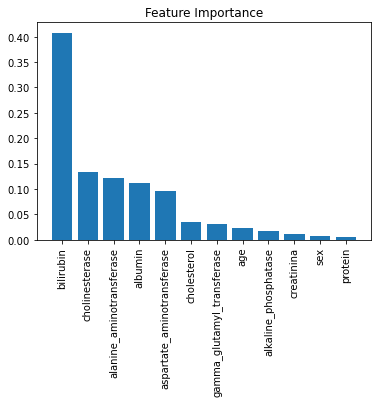

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# Split the data into independent and dependent variables
X = np.array(data.iloc[:, 1:])  # independent variables
y = np.array(data.iloc[:, 0])   # dependent variable

# Fit a decision tree regressor to the data
model = DecisionTreeRegressor()
model.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data.columns[i+1] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [57]:
x

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,32,1,38.5,52.500,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.300,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.700,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.100,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.600,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.800,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.300,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,62.600,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [58]:
y

array([3, 3, 3, ..., 4, 4, 4])

In [59]:
data

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,4,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
2661,4,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
2662,4,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
2663,4,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8


In [60]:
df_resampled

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,category
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,3
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,3
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,3
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8,4
2661,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0,4
2662,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3,4
2663,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8,4


In [61]:
data.shape

(3280, 13)

In [62]:
# Split your data into training and testing sets
x = df_resampled.iloc[:, 0:-1]  # independent variables
y = df_resampled.iloc[:, -1]   # dependent variable
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB(),
          RidgeClassifier()]

In [64]:
accuracy = []
for model in models:
    cross_val = cross_val_score(model, X_train, y_train, scoring='accuracy',
                               cv=StratifiedKFold(20)).mean()
    accuracy.append(cross_val)

In [65]:
models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC',
         'LogisticRegression', 'KNeighborsClassifier', 'BernoulliNB', 'RidgeClassifier']

acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})                            
acc

,Model,Accuracy
0,DecisionTreeClassifier,0.992025
1,RandomForestClassifier,0.999061
2,SVC,0.882759
3,LogisticRegression,0.859848
4,KNeighborsClassifier,0.988750
5,BernoulliNB,0.256996
6,RidgeClassifier,0.809161


In [66]:
# Random Forest Gives Good Accuracy 

### ANN

In [67]:
from keras.wrappers.scikit_learn import KerasClassifier

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV

In [69]:
# Split your data into independent variables and dependent variable
X = data.iloc[:, 1:]  # independent variables
y = data.iloc[:, 0]  # dependent variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Define a function to create the Keras model
def create_model(num_layers=1, num_neurons=8, activation='relu'):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=12, activation=activation))
    for i in range(num_layers-1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [71]:
# Create a KerasClassifier with the create_model function
model = KerasClassifier(build_fn=create_model)

In [72]:
# Define the hyperparameters to search
param_grid = {
    'num_layers': [1, 2, 3],
    'num_neurons': [2, 4, 8],
    'activation': ['relu', 'sigmoid']
}
# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [73]:
# Fit the GridSearchCV object to the data
grid_result = grid.fit(X_train, y_train)

58/58 [==============================] - 1s 819us/step - loss: 2.1913 - accuracy: 0.1503


72/72 [==============================] - 1s 842us/step - loss: -0.5864 - accuracy: 0.1463


In [74]:
# Print the best hyperparameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.194239 using {'activation': 'relu', 'num_layers': 2, 'num_neurons': 2}


In [75]:
final_model = create_model(num_layers=2, num_neurons=4, activation='sigmoid')
# Train the final model on the entire training set
final_model.fit(X_train, y_train, epochs=50, batch_size=32)
# Evaluate the final model on the test set
loss, accuracy = final_model.evaluate(X_test, y_test)
print("Test accuracy: %.2f%%" % (accuracy * 100))

Epoch 1/50
72/72 [==============================] - 1s 993us/step - loss: -1.9011 - accuracy: 0.1747
Epoch 2/50
72/72 [==============================] - 0s 1ms/step - loss: -2.3715 - accuracy: 0.1747
Epoch 3/50
72/72 [==============================] - 0s 1ms/step - loss: -2.8167 - accuracy: 0.1747
Epoch 4/50
72/72 [==============================] - 0s 925us/step - loss: -3.2667 - accuracy: 0.1747
Epoch 5/50
72/72 [==============================] - 0s 871us/step - loss: -3.7303 - accuracy: 0.1747
Epoch 6/50
72/72 [==============================] - 0s 971us/step - loss: -4.2050 - accuracy: 0.1747
Epoch 7/50
72/72 [==============================] - 0s 952us/step - loss: -4.7670 - accuracy: 0.1747
Epoch 8/50
72/72 [==============================] - 0s 1ms/step - loss: -5.4228 - accuracy: 0.1747
Epoch 9/50
72/72 [==============================] - 0s 899us/step - loss: -5.9955 - accuracy: 0.1747
Epoch 10/50
72/72 [==============================] - 0s 875us/step - loss: -6.5345 - accuracy: 0.

In [76]:
# # Train the final model on the entire training set
# final_model.fit(X_train, y_train, epochs=50, batch_size=32)
# # Evaluate the final model on the test set
# loss, accuracy = final_model.evaluate(X_test, y_test)
# print("Test accuracy: %.2f%%" % (accuracy * 100))

### Random Forest Classifier 

In [77]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [78]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [79]:
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [80]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 1.56 s
Wall time: 1min 7s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [81]:
grid_search.best_score_

0.9991289198606272

In [82]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [83]:
feature_names = ['no_disease','suspect_disease','hepatitis','fibrosis','cirrhosis']

In [84]:
classifier_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [85]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 54.9 ms


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [86]:
pred = classifier_rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       155
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       172
           3       1.00      0.99      1.00       339
           4       1.00      1.00      1.00       165

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

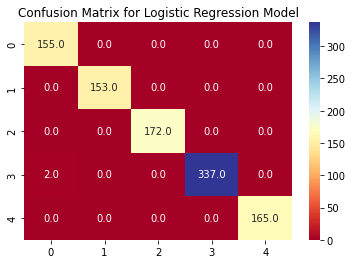

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))

sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdYlBu")
plt.title("Confusion Matrix for Logistic Regression Model")

In [88]:
pickle.dump(classifier_rf, open('RandomForest_model.pkl', 'wb'))

In [89]:
import joblib
# Save the trained model using joblib
joblib.dump(classifier_rf, 'Random_forest.joblib')

['Random_forest.joblib']

In [90]:
def class_name(p):
  if p == 1:
    return 'no_disease'
  elif p ==2:
    return 'suspect_disease'
  elif p == 3:
    return 'hepatitis'
  elif p == 4:
    return 'fibrosis'
  elif p == 5:
    return 'cirrhosis'
  else:
    return "nouthing"

In [91]:
# Predict a new class based on 13 features
new_features =[[29,0,41,43.1,2.4,83.5,6,11.49,5.42,55.2,130,66.5]]
new_prediction = classifier_rf.predict(new_features)
class_detect = class_name(new_prediction)
class_detect
#print("New prediction: ", new_prediction)

'no_disease'

In [96]:
new_features =[[70,1,45,40.1,2.8,83.7,4,11.49,5.55,55.2,120,70]]
new_prediction = classifier_rf.predict(new_features)
class_detect = class_name(new_prediction)
class_detect

'suspect_disease'